In [1]:
import sys
sys.path.append('../../code')

In [2]:
import convml_tt

from pathlib import Path

from fastai.basic_train import load_learner

In [3]:
from convml_tt.architectures.triplet_trainer import monkey_patch_fastai
monkey_patch_fastai()

In [4]:
import fastai
fastai.__version__

'1.0.43.post1'

In [5]:
data_path = Path('../../data/storage')
(data_path/"tiles"/"goes16").ls()

[PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N10000'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N10000_set2'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N1000study_N10000train'),
 PosixPath('../../data/storage/tiles/goes16/set1'),
 PosixPath('../../data/storage/tiles/goes16/set2'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N0study_N10train'),
 PosixPath('../../data/storage/tiles/goes16/models')]

In [6]:
tileset_path = data_path/"tiles"/"goes16"/"Nx256_s200000.0_N500study_N2000train"
tile_path = tileset_path/"study"
models_path = tileset_path/"train"/"models"

In [7]:
model = load_learner(models_path, "stage-1.pkl")

In [8]:
triplets = convml_tt.NPMultiImageList.from_folder(tile_path)
triplets

NPMultiImageList (500 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]
Path: ../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train/study

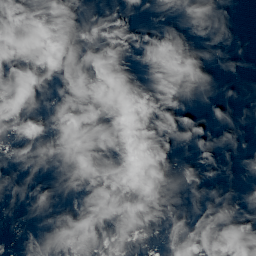

In [9]:
triplets[0][0]

In [10]:
encodings = convml_tt.get_encodings(triplets, model)

100%|██████████| 500/500 [00:30<00:00, 17.16it/s]


In [11]:
encodings

<xarray.DataArray (tile_id: 500, enc_dim: 100)>
array([[-0.057738,  0.034694,  0.037043, ...,  0.021907,  0.068567, -0.05971 ],
       [-0.045319,  0.017288,  0.187497, ...,  0.074235,  0.093561,  0.025728],
       [ 0.143855, -0.148752, -0.26558 , ..., -0.127735, -0.190605, -0.023842],
       ...,
       [ 0.085761, -0.155954, -0.198646, ..., -0.0581  , -0.084231,  0.017921],
       [ 0.10804 , -0.16091 , -0.213996, ..., -0.089401, -0.108375,  0.04414 ],
       [ 0.104399, -0.143942, -0.224941, ..., -0.084925, -0.124455, -0.006198]],
      dtype=float32)
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * enc_dim  (enc_dim) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    tile_used:    anchor
    source_path:  /nfs/a289/earlcd/OneDrive/ML/research/convective_organisati...

In [12]:
encodings.to_netcdf('encodings_example.nc')

# dendrogram

In [13]:
import xarray as xr

In [14]:
encodings = xr.open_dataarray('encodings_example.nc')

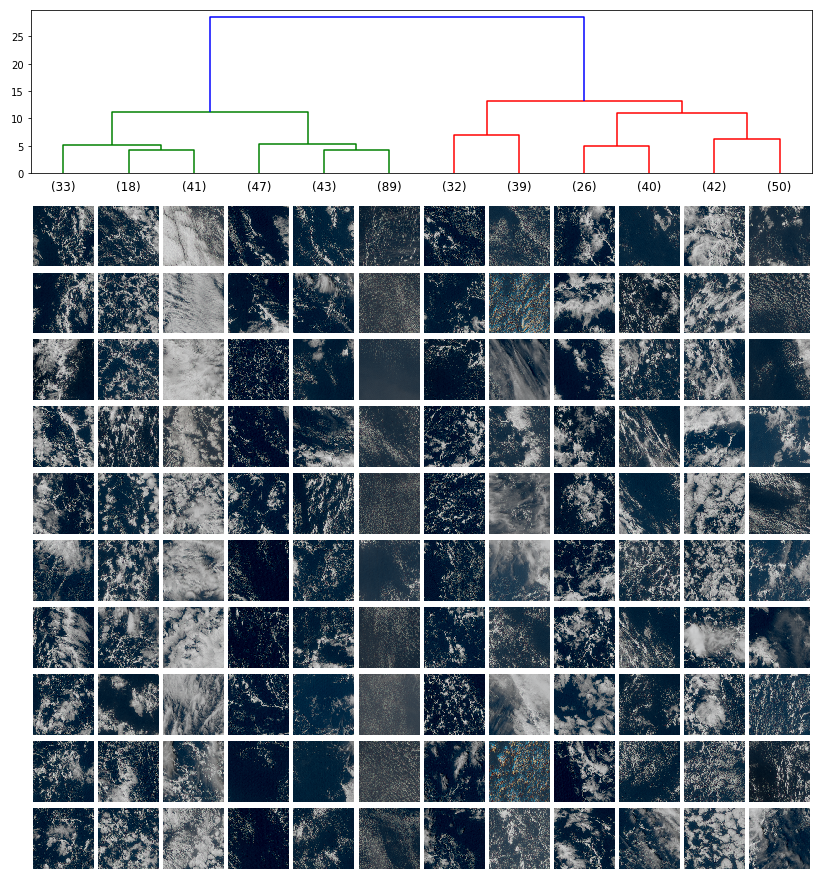

In [15]:
convml_tt.interpretation.plots.dendrogram(encodings, n_samples=10, n_clusters_max=12)

# Annotated scatter plots

In [16]:
import xarray as xr

In [17]:
encodings = xr.open_dataarray('encodings_example.nc')

In [18]:
encodings

<xarray.DataArray (tile_id: 500, enc_dim: 100)>
array([[-0.057738,  0.034694,  0.037043, ...,  0.021907,  0.068567, -0.05971 ],
       [-0.045319,  0.017288,  0.187497, ...,  0.074235,  0.093561,  0.025728],
       [ 0.143855, -0.148752, -0.26558 , ..., -0.127735, -0.190605, -0.023842],
       ...,
       [ 0.085761, -0.155954, -0.198646, ..., -0.0581  , -0.084231,  0.017921],
       [ 0.10804 , -0.16091 , -0.213996, ..., -0.089401, -0.108375,  0.04414 ],
       [ 0.104399, -0.143942, -0.224941, ..., -0.084925, -0.124455, -0.006198]],
      dtype=float32)
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * enc_dim  (enc_dim) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    tile_used:    anchor
    source_path:  /nfs/a289/earlcd/OneDrive/ML/research/convective_organisati...

In [19]:
import numpy as np
import matplotlib.pyplot as plt

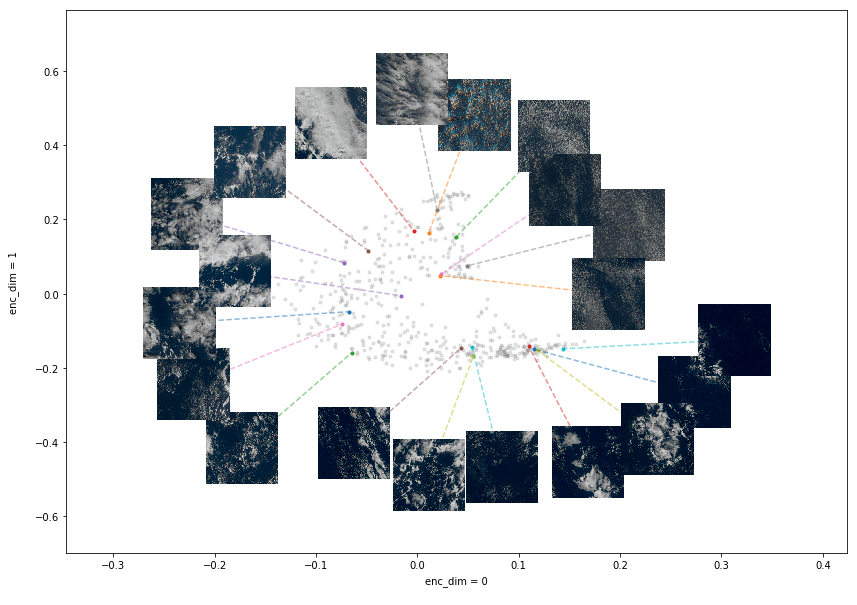

In [20]:
x = encodings.sel(enc_dim=0)
y = encodings.sel(enc_dim=1)
#fig, ax = plt.subplots(figsize=(8,6))
ax = None
convml_tt.interpretation.plots.scatter_annotated(x=x, y=y, points=20, ax=ax)

## plot specific points and annotate with nearest tile

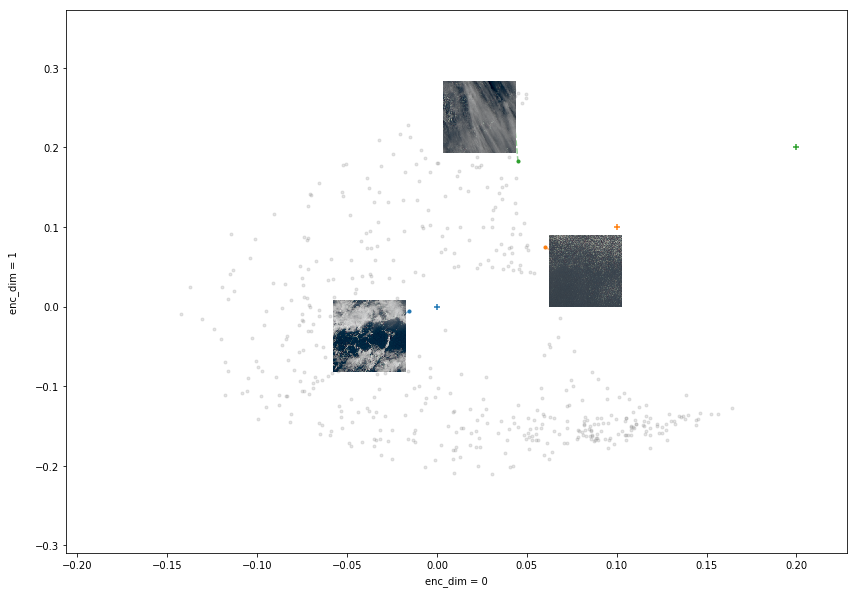

In [21]:
x = encodings.sel(enc_dim=0)
y = encodings.sel(enc_dim=1)

points = (np.array([0., 0.1, 0.2]), np.array([0., 0.1, 0.2]))

convml_tt.interpretation.plots.scatter_annotated(x=x, y=y, points=points)

## plot specific points with error bars

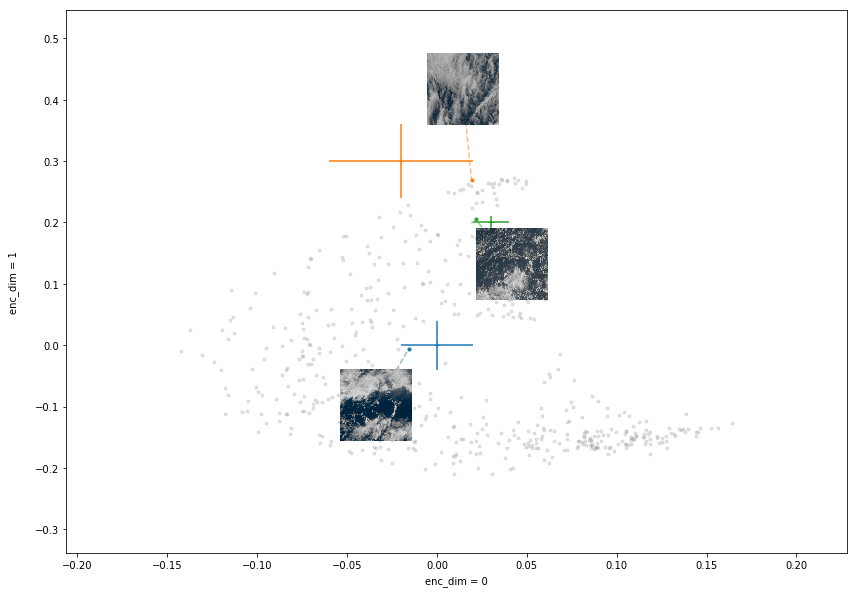

In [22]:
x = encodings.sel(enc_dim=0)
y = encodings.sel(enc_dim=1)

points = (
    (np.array([0., -0.02, 0.03]), np.array([0.02, 0.04, 0.01])), 
    (np.array([0., 0.3, 0.2]), np.array([0.04, 0.06, 0.01])),
)

convml_tt.interpretation.plots.scatter_annotated(x=x, y=y, points=points)

# Grid overview

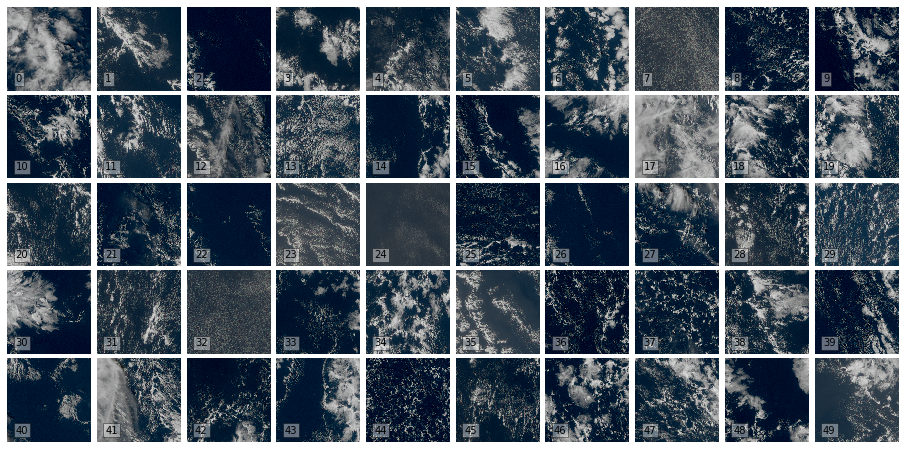

In [23]:
convml_tt.interpretation.plots.grid_overview(triplets, points =50)

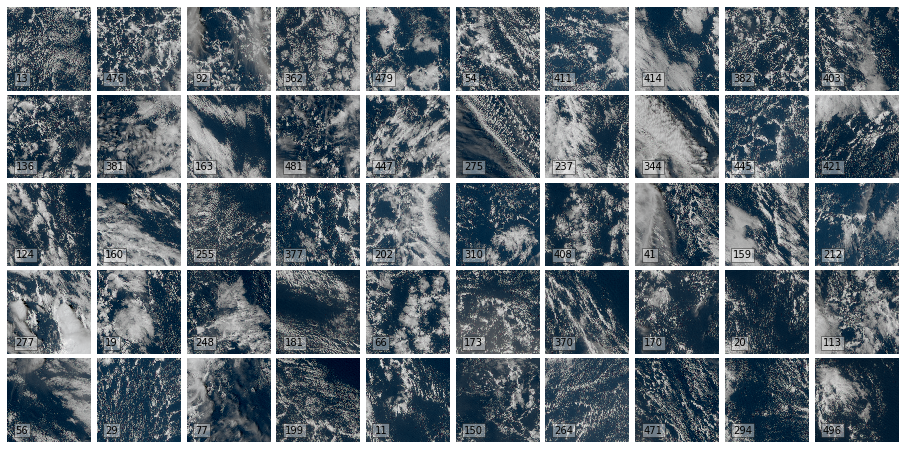

In [24]:
# can be used to for studying a ranking too
def get_dist_to_tile(tile_id, encodings):
    dist = np.linalg.norm(encodings.sel(tile_id=tile_id) - encodings, axis=0)
    da_dist = xr.DataArray(dist, coords=dict(tile_id=encodings.tile_id), dims=('tile_id',))
    encodings['dist1'] = da_dist
    return encodings

encodings = get_dist_to_tile(13, encodings)
tile_ids = encodings.sortby('dist1').tile_id.values[:50]

convml_tt.interpretation.plots.grid_overview(triplets, points=tile_ids)